# About Dataset
This dataset provides synthetic yet realistic 02 Years data for analyzing and forecasting retail store inventory demand. It contains over 73000 rows of daily data across multiple stores and products, including attributes like sales, inventory levels, pricing, weather, promotions, and holidays.
The dataset is ideal for practicing machine learning tasks. It allows data scientists to study the impact of external factors like weather and holidays on sales, and build advanced models to optimize supply chain performance.

# Challenges:
Challenge 1:

Model Building: Buid a model to predict daily product demand across stores using historical data.

Challenge 2:

Classification of Inventory: Classify inventory into ABC classification based on monetary value.

# Key Data Features:

Date: Daily records from [start_date] to [end_date].

Store ID & Product ID: Unique identifiers for stores and products.

Category: Product categories like Electronics, Clothing, Groceries, etc.

Region: Geographic region of the store.

Inventory Level: Stock available at the beginning of the day.

Units Sold: Units sold during the day.

Demand Forecast: Predicted demand based on past trends.

Weather Condition: Daily weather impacting sales.

Holiday/Promotion: Indicators for holidays or promotions.

# PROJECT DETAILS:


# Data Set Shortcomings:
  Many columns were not inter-connected like 'Store ID' & 'Region', 'Product ID' and 'Price' etc.,

# Key Results of Data Analysis:
  1. Dataset was already cleaned and comprises of 73100 Rows and 15 Columns with 0 Null Values.
  2. Product ID: P0018 was the unit pertaining to Furniture category sold highest in a day with a Qty of 499.
  3. Highest Selling Region was 'East' with a selling Qty of 2511265.
  4. Highest Selling Store was 'S003' with a selling Qty of 2022696.
  5. Maximum Units were sold in 'Autumn' season with Qty 2506676.
  6. Maimum Units were sold in 'Sunny' weather with Qty 2524544.
  7. Out of 20 Products P0016 is the highest selling Product, 508472 Units Sold.
  8. Out of 20 Products P0002 is the lowest selling Product, 487827 Units Sold.
  9. Out of 20 Products the highest Revenue generating Product is P0011 = 206263.69
  10. Out of 20 Products the lowest Revenue generating Product is P0001 = 199370.49
  11. Maximum stock was sold in the month of July 2023.

# Application of Model and Its Results:
  
  Results of XGBoost Regressor:
  
  R2 : 0.993

  Mean Squared Error:  75.49
  
  Mean Absolute Error:  7.47

# Inventory Classification:
  Inventory was divided into categories A, B and C based on its monetary valuation:

  The category A comprised of 37.1% and 22.8% of Value and Quantity respectively out of 100%.
  
  The category B comprised of 38.8% and 33% of Value and Quantity respectivey out of 100%.
  
  The category C comprised of 24.1% and 44.2% of Value and Quantity respectively out of 100%
  
  Total Inventory Value is : 1108476100.30
  .

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NED Machine Learning Course/ML Project/retail_store_inventory.csv')

In [ ]:
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [ ]:
df.shape

(73100, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [ ]:
df.describe()

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077
std,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000


In [ ]:
df.describe(include='object')

,Date,Store ID,Product ID,Category,Region,Weather Condition,Seasonality
count,73100,73100,73100,73100,73100,73100,73100
unique,731,5,20,5,4,4,4
top,2024-01-01,S001,P0001,Furniture,East,Sunny,Spring
freq,100,14620,3655,14699,18349,18290,18317


In [ ]:
df.columns

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality'],
      dtype='object')

In [ ]:
df['Region'].unique()

array(['North', 'South', 'West', 'East'], dtype=object)

In [ ]:
df['Store ID'].unique()

array(['S001', 'S002', 'S003', 'S004', 'S005'], dtype=object)

In [ ]:
df['Product ID'].unique()

array(['P0001', 'P0002', 'P0003', 'P0004', 'P0005', 'P0006', 'P0007',
       'P0008', 'P0009', 'P0010', 'P0011', 'P0012', 'P0013', 'P0014',
       'P0015', 'P0016', 'P0017', 'P0018', 'P0019', 'P0020'], dtype=object)

In [ ]:
df['Category'].unique()

array(['Groceries', 'Toys', 'Electronics', 'Furniture', 'Clothing'],
      dtype=object)

In [ ]:
df['Weather Condition'].unique()

array(['Rainy', 'Sunny', 'Cloudy', 'Snowy'], dtype=object)

In [ ]:
df['Holiday/Promotion'].unique()

array([0, 1])

In [ ]:
df['Seasonality'].unique()

array(['Autumn', 'Summer', 'Winter', 'Spring'], dtype=object)

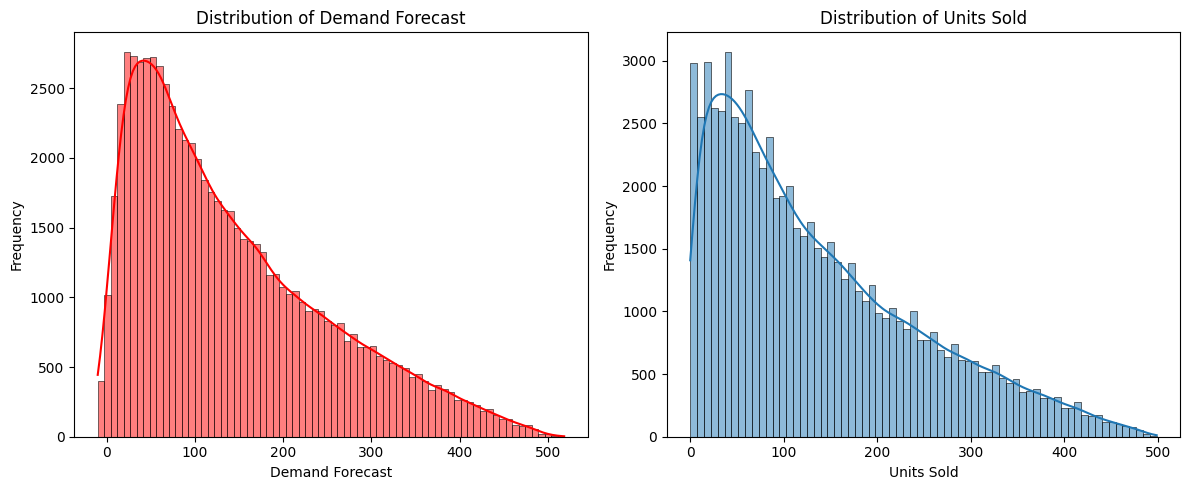

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['Demand Forecast'], kde=True, color='red', ax=axes[0])
axes[0].set_xlabel('Demand Forecast')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Demand Forecast')

sns.histplot(df['Units Sold'], kde=True, ax=axes[1])
axes[1].set_xlabel('Units Sold')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Units Sold')

plt.tight_layout()
plt.show()

In [ ]:
# No. of Maximum Units Sold in a day.
df[df['Units Sold'] == 499]

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
53157,2023-06-16,S003,P0018,Furniture,East,499,499,84,518.55,19.95,10,Snowy,0,16.0,Summer


In [ ]:
# maximum Units were sold in region 'East'
df.groupby('Region')['Units Sold'].sum()

,Units Sold
Region,
East,2511265
North,2484966
South,2507799
West,2471552


In [ ]:
# maximum Units were sold by Store 'S003'
df.groupby('Store ID')['Units Sold'].sum()

,Units Sold
Store ID,
S001,1975750
S002,1987715
S003,2022696
S004,1979245
S005,2010176


In [ ]:
# maximum Units were sold in 'Autumn'
df.groupby('Seasonality')['Units Sold'].sum()

,Units Sold
Seasonality,
Autumn,2506676
Spring,2487940
Summer,2479015
Winter,2501951


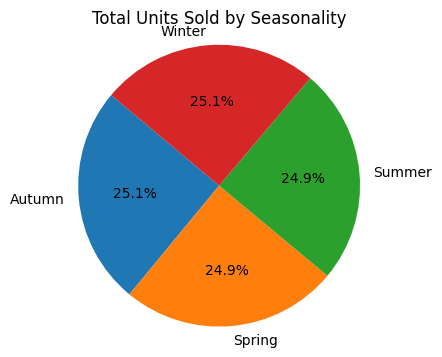

In [ ]:
# Calculate the sum of Units Sold for each Seasonality
seasonality_sales = df.groupby('Seasonality')['Units Sold'].sum()

plt.figure(figsize=(4, 4))
plt.pie(seasonality_sales, labels=seasonality_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Units Sold by Seasonality')
plt.axis('equal')
plt.show()

In [ ]:
# maximum Units were sold when weather was 'Sunny'
df.groupby('Weather Condition')['Units Sold'].sum()

,Units Sold
Weather Condition,
Cloudy,2497207
Rainy,2470455
Snowy,2483376
Sunny,2524544


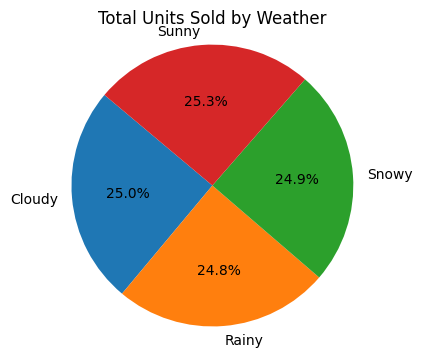

In [ ]:
weather_sales = df.groupby('Weather Condition')['Units Sold'].sum()
plt.figure(figsize=(4, 4))
plt.pie(weather_sales, labels=weather_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Units Sold by Weather')
plt.axis('equal')
plt.show()

In [ ]:
# Out of 20 Products P0016 is the highest selling Product: 508472 Units Sold.
# Out of 20 Products P0002 is the lowest selling Product 487827 Units Sold.
product_sold = df.groupby('Product ID')['Units Sold'].sum()
print('Highest Selling Product: ', max(product_sold))
print('Lowest Selling Product: ', min(product_sold))
print(product_sold)

Highest Selling Product:  508472
Lowest Selling Product:  487827
Product ID
P0001    498061
P0002    487827
P0003    493279
P0004    495501
P0005    503648
P0006    497131
P0007    499321
P0008    488563
P0009    502086
P0010    496469
P0011    499362
P0012    491670
P0013    500619
P0014    507622
P0015    507283
P0016    508472
P0017    500510
P0018    492551
P0019    497899
P0020    507708
Name: Units Sold, dtype: int64


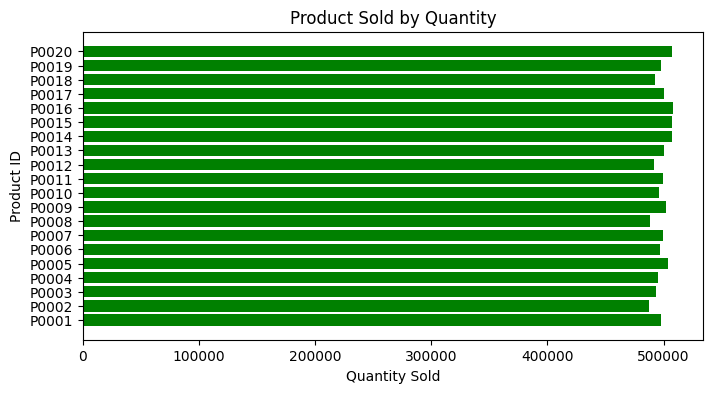

In [ ]:
plt.figure(figsize=(8, 4))
plt.barh(product_sold.index, product_sold.values, color='green')
plt.xlabel('Quantity Sold')
plt.ylabel('Product ID')
plt.title('Product Sold by Quantity')
plt.show()

In [ ]:
# out of 20 Products the highest Revenue generating Product is P0011 = 206263.69
# out of 20 Products the lowest Revenue generating Product is P0001 = 199370.49
product_price = df.groupby('Product ID')['Price'].sum()
print('Highest Revenue Product: ', max(product_price))
print('Lowest Revenue Product: ', min(product_price))
print(product_price)

Highest Revenue Product:  206263.69
Lowest Revenue Product:  199370.49
Product ID
P0001    199370.49
P0002    202003.54
P0003    200607.45
P0004    202994.92
P0005    201111.22
P0006    200174.91
P0007    200725.00
P0008    202302.18
P0009    201596.04
P0010    202344.45
P0011    206263.69
P0012    200881.07
P0013    201253.45
P0014    203808.58
P0015    200186.96
P0016    200411.07
P0017    199733.17
P0018    200356.77
P0019    201311.12
P0020    202940.33
Name: Price, dtype: float64


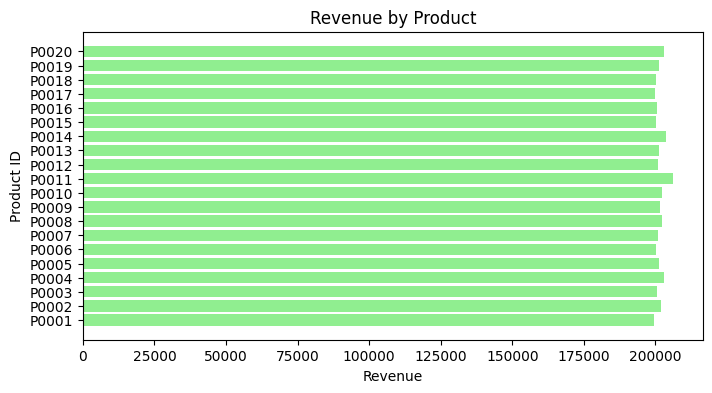

In [ ]:
plt.figure(figsize=(8, 4))
plt.barh(product_price.index, product_price.values, color='lightgreen')
plt.xlabel('Revenue')
plt.ylabel('Product ID')
plt.title('Revenue by Product')
plt.show()

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/NED Machine Learning Course/ML Project/retail_store_inventory.csv', parse_dates=['Date'])
df1.set_index('Date', inplace=True)

In [ ]:
# Demand Forecast for July 2023 remained at the highest level: 454511.6
monthly_demand = df1['Demand Forecast'].resample('ME').sum()
print('Highest Demand: ', max(monthly_demand.head(25)))
print(monthly_demand.head(25))

Highest Demand:  454511.6
Date
2022-01-31    435589.72
2022-02-28    405486.42
2022-03-31    442065.41
2022-04-30    422445.83
2022-05-31    429732.32
2022-06-30    430489.22
2022-07-31    442158.64
2022-08-31    440359.69
2022-09-30    427070.14
2022-10-31    442145.19
2022-11-30    429495.95
2022-12-31    427987.24
2023-01-31    438845.24
2023-02-28    400181.47
2023-03-31    432044.77
2023-04-30    415337.59
2023-05-31    433438.68
2023-06-30    421087.56
2023-07-31    454511.60
2023-08-31    432729.17
2023-09-30    419872.74
2023-10-31    441006.74
2023-11-30    431969.43
2023-12-31    433490.78
2024-01-31     13722.50
Freq: ME, Name: Demand Forecast, dtype: float64


In [ ]:
# July 2023 also remained month with highest sales: 437919
unit_sold_monthly = df1['Units Sold'].resample('ME').sum()
print('Monthly Highest Sales: ', max(unit_sold_monthly.head(25)))
print(unit_sold_monthly.head(25))

Monthly Highest Sales:  437919
Date
2022-01-31    419938
2022-02-28    391052
2022-03-31    426073
2022-04-30    407380
2022-05-31    414799
2022-06-30    415509
2022-07-31    426628
2022-08-31    424916
2022-09-30    411610
2022-10-31    426863
2022-11-30    414535
2022-12-31    412321
2023-01-31    423408
2023-02-28    385168
2023-03-31    416522
2023-04-30    401077
2023-05-31    418673
2023-06-30    405641
2023-07-31    437919
2023-08-31    416501
2023-09-30    405361
2023-10-31    425646
2023-11-30    416126
2023-12-31    418672
2024-01-31     13244
Freq: ME, Name: Units Sold, dtype: int64


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                73100 non-null  datetime64[ns]
 1   Store ID            73100 non-null  object        
 2   Product ID          73100 non-null  object        
 3   Category            73100 non-null  object        
 4   Region              73100 non-null  object        
 5   Inventory Level     73100 non-null  int64         
 6   Units Sold          73100 non-null  int64         
 7   Units Ordered       73100 non-null  int64         
 8   Demand Forecast     73100 non-null  float64       
 9   Price               73100 non-null  float64       
 10  Discount            73100 non-null  int64         
 11  Weather Condition   73100 non-null  object        
 12  Holiday/Promotion   73100 non-null  int64         
 13  Competitor Pricing  73100 non-null  float64   

In [ ]:
x = df.drop(columns=['Demand Forecast', 'Store ID', 'Category', 'Region', 'Inventory Level', 'Units Ordered'])
y = df['Demand Forecast']

In [ ]:
x

,Date,Product ID,Units Sold,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,P0001,127,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,P0002,150,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,P0003,65,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,P0004,61,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,P0005,14,73.64,0,Sunny,0,68.95,Summer
...,...,...,...,...,...,...,...,...,...
73095,2024-01-01,P0016,8,73.73,20,Snowy,0,72.45,Winter
73096,2024-01-01,P0017,51,82.57,10,Cloudy,0,83.78,Autumn
73097,2024-01-01,P0018,36,11.11,10,Rainy,0,10.91,Winter
73098,2024-01-01,P0019,264,53.14,20,Rainy,0,55.80,Spring


In [ ]:
cat_col = x.select_dtypes(include=['object', 'category']).columns
num_col = x.select_dtypes(include='number').columns

In [ ]:
encoder= OneHotEncoder(drop='first', sparse_output=False)
x_cat= encoder.fit_transform(x[cat_col])
x_cat.shape

(73100, 25)

In [ ]:
x_combined= np.hstack([x[num_col].values, x_cat])
x_combined.shape

(73100, 30)

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x_combined, y, test_size=0.2, random_state=5)

In [ ]:
scaler= StandardScaler()
x_train_scaled= scaler.fit_transform(x_train)
x_train_scaled

array([[-3.50425096e-01, -8.77111295e-02, -1.41054095e+00, ...,
        -5.79166834e-01,  1.73134027e+00, -5.77955789e-01],
       [ 1.36841366e+00, -6.52256236e-01, -1.41054095e+00, ...,
        -5.79166834e-01, -5.77587212e-01,  1.73023615e+00],
       [-4.42341607e-01,  6.14893714e-01, -1.41054095e+00, ...,
        -5.79166834e-01, -5.77587212e-01,  1.73023615e+00],
       ...,
       [-8.00815999e-01,  9.72541499e-01, -1.41054095e+00, ...,
        -5.79166834e-01,  1.73134027e+00, -5.77955789e-01],
       [ 3.48140386e-01,  2.91973940e-02, -1.68820193e-04, ...,
         1.72661821e+00, -5.77587212e-01, -5.77955789e-01],
       [-6.54839125e-02,  1.53939401e+00, -7.05354883e-01, ...,
        -5.79166834e-01, -5.77587212e-01,  1.73023615e+00]])

In [ ]:
x_test_scaled= scaler.transform(x_test)
x_test_scaled

array([[ 1.45924062e-01,  7.17573239e-01,  1.41020331e+00, ...,
         1.72661821e+00, -5.77587212e-01, -5.77955789e-01],
       [-7.91624348e-01, -1.54714484e+00, -1.68820193e-04, ...,
         1.72661821e+00, -5.77587212e-01, -5.77955789e-01],
       [ 1.59820493e+00,  4.80679652e-01, -1.41054095e+00, ...,
        -5.79166834e-01,  1.73134027e+00, -5.77955789e-01],
       ...,
       [-7.73241045e-01, -1.08862343e-01, -1.41054095e+00, ...,
        -5.79166834e-01, -5.77587212e-01, -5.77955789e-01],
       [-7.45666092e-01, -1.66366879e+00,  1.41020331e+00, ...,
        -5.79166834e-01, -5.77587212e-01, -5.77955789e-01],
       [-5.43449769e-01, -4.65356426e-01,  1.41020331e+00, ...,
         1.72661821e+00, -5.77587212e-01, -5.77955789e-01]])

# USING XGBOOST REGRESSOR

In [ ]:
model = xgb.XGBRegressor(learning_rate= 0.1, max_depth= 5, n_estimators= 200)
model.fit(x_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
best_model = xgb.XGBRegressor(**grid_search.best_params_)

best_model.fit(x_train_scaled, y_train)

y_pred = best_model.predict(x_test_scaled)

In [ ]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
64202,154.98,157.387054
7533,50.98,54.438282
58116,303.61,314.485138
61611,82.55,81.083267
17931,174.45,165.312195
...,...,...
37009,26.64,32.044140
68302,134.23,141.356781
49354,47.94,56.714211
30996,45.54,61.381756


In [ ]:
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('R2 Score: ', r2_score(y_test, y_pred))

Mean Squared Error:  75.49569764427018
Mean Absolute Error:  7.473592771038963
R2 Score:  0.9937430555521526


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(x_train_scaled, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
Best Score:  0.9935577706690623


In [ ]:
# Checking R^2 on Training and Testing Data Separately:

# Make predictions on the training data
y_train_pred = best_model.predict(x_train_scaled)

# Calculate R2 score for the training data
train_r2 = r2_score(y_train, y_train_pred)

# Make predictions on the test data
y_test_pred = best_model.predict(x_test_scaled)

# Calculate R2 score for the test data
test_r2 = r2_score(y_test, y_test_pred)

print(f"R2 Score (Training Data): {train_r2:.4f}")
print(f"R2 Score (Test Data): {test_r2:.4f}")

# Classifying Inventory into ABC based on Value/Price

# CAT A

In [ ]:
cat_A_inv = df[df['Price'].between(80, 100)][['Product ID', 'Inventory Level', 'Units Ordered', 'Price']]
cat_A_inv['Inventory Value']= cat_A_inv['Inventory Level'] * cat_A_inv['Price']
cat_A_inv.sort_values(by='Inventory Value', ascending=False)

,Product ID,Inventory Level,Units Ordered,Price,Inventory Value
72671,P0012,500,43,99.78,49890.00
21993,P0014,500,107,99.59,49795.00
7509,P0010,500,184,99.52,49760.00
38225,P0006,500,185,99.48,49740.00
49523,P0004,498,197,99.63,49615.74
...,...,...,...,...,...
12796,P0017,50,61,82.07,4103.50
34316,P0017,50,146,81.97,4098.50
32518,P0019,50,170,81.18,4059.00
36611,P0012,50,188,80.21,4010.50


# CAT B

In [ ]:
cat_B_inv= df[df['Price'].between(51, 79.99)][['Product ID', 'Inventory Level', 'Units Ordered', 'Price']]
cat_B_inv['Inventory Value']= cat_B_inv['Inventory Level'] * cat_B_inv['Price']
cat_B_inv.sort_values(by='Inventory Value', ascending=False)

,Product ID,Inventory Level,Units Ordered,Price,Inventory Value
59674,P0015,499,159,79.96,39900.04
35417,P0018,500,163,79.72,39860.00
59711,P0012,500,53,79.35,39675.00
63997,P0018,497,71,79.81,39665.57
56191,P0012,500,160,79.21,39605.00
...,...,...,...,...,...
55262,P0003,50,142,53.38,2669.00
16444,P0005,51,60,51.76,2639.76
37827,P0008,51,118,51.38,2620.38
14879,P0020,51,43,51.25,2613.75


# CAT C

In [ ]:
cat_C_inv = df[df['Price'].between(0, 50.99)][['Product ID', 'Inventory Level', 'Units Ordered', 'Price']]
cat_C_inv['Inventory Value']= cat_C_inv['Inventory Level'] * cat_C_inv['Price']
cat_C_inv.sort_values(by='Inventory Value', ascending=False)

,Product ID,Inventory Level,Units Ordered,Price,Inventory Value
3592,P0013,500,150,50.65,25325.00
63879,P0020,500,150,50.48,25240.00
24663,P0004,500,91,50.38,25190.00
44681,P0002,499,142,50.37,25134.63
56826,P0007,497,108,50.57,25133.29
...,...,...,...,...,...
54711,P0012,52,50,10.89,566.28
41342,P0003,53,57,10.28,544.84
64970,P0011,53,31,10.17,539.01
2883,P0004,50,200,10.63,531.50


# Share of Each Inventory Category

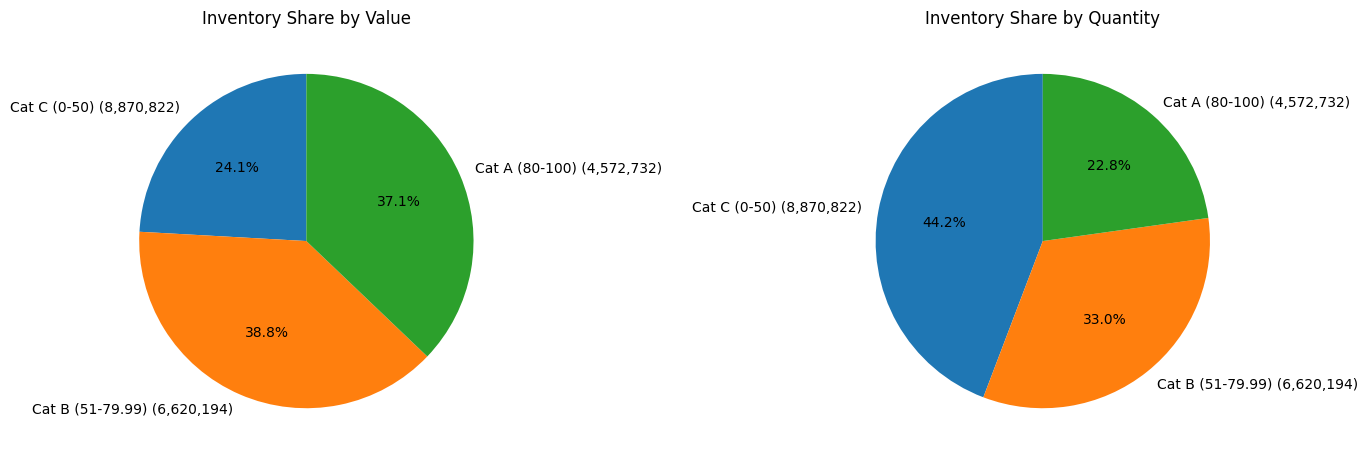

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot Inventory Share by Value on the left
axes[0].pie(inventory_value_by_cat, labels=labels_level, autopct='%1.1f%%', startangle=90)
axes[0].set_title("Inventory Share by Value")
axes[0].set_ylabel("")

# Plot Inventory Share by Level on the right
axes[1].pie(inventory_by_cat, labels=labels_level, autopct='%1.1f%%', startangle=90)
axes[1].set_title("Inventory Share by Quantity")
axes[1].set_ylabel("")

plt.tight_layout(pad=3.0)
plt.show()

In [ ]:
# Calculating total Inventory Value by Price:
total_inventory_value = cat_A_inv['Inventory Value'].sum() + cat_B_inv['Inventory Value'].sum() + cat_C_inv['Inventory Value'].sum()
print('Total Inventory Value: ', total_inventory_value)

Total Inventory Value:  1108476100.3000002
